# Kasra Samadi 993623030

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline

### reading train.csv and test.csv

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,85,5.4,3.0,4.5,1.5,Iris-versicolor
1,123,7.7,2.8,6.7,2.0,Iris-virginica
2,29,5.2,3.4,1.4,0.2,Iris-setosa
3,25,4.8,3.4,1.9,0.2,Iris-setosa
4,76,6.6,3.0,4.4,1.4,Iris-versicolor
...,...,...,...,...,...,...
115,118,7.7,3.8,6.7,2.2,Iris-virginica
116,60,5.2,2.7,3.9,1.4,Iris-versicolor
117,46,4.8,3.0,1.4,0.3,Iris-setosa
118,33,5.2,4.1,1.5,0.1,Iris-setosa


In [4]:
print(df_train.isna().sum())
print(df_test.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


### define train_df , test_df

In [5]:
train_df = df_train.drop(["Id"], axis=1)
test_df = df_test.drop(["Id"], axis=1)

### plot PetalLengthCm - PetalWidthCm for train_df

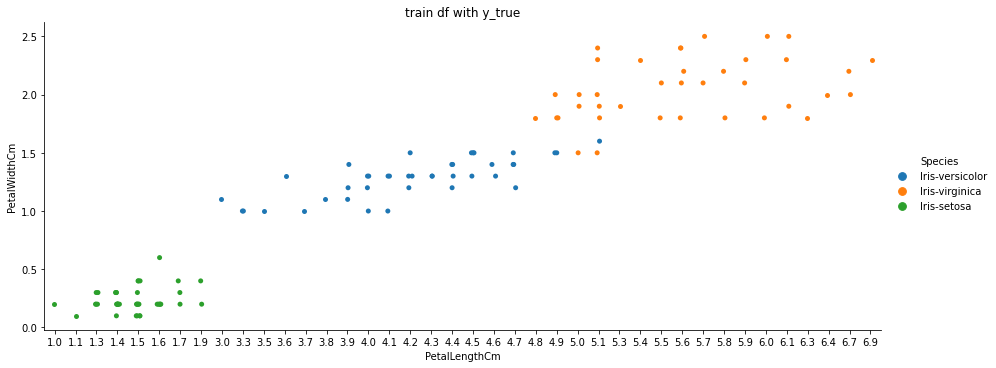

In [6]:
sns.catplot(x='PetalLengthCm', y='PetalWidthCm', data=train_df, hue='Species', aspect=2.5).set(title='train df with y_true')

### plot PetalLengthCm - PetalWidthCm for test_df

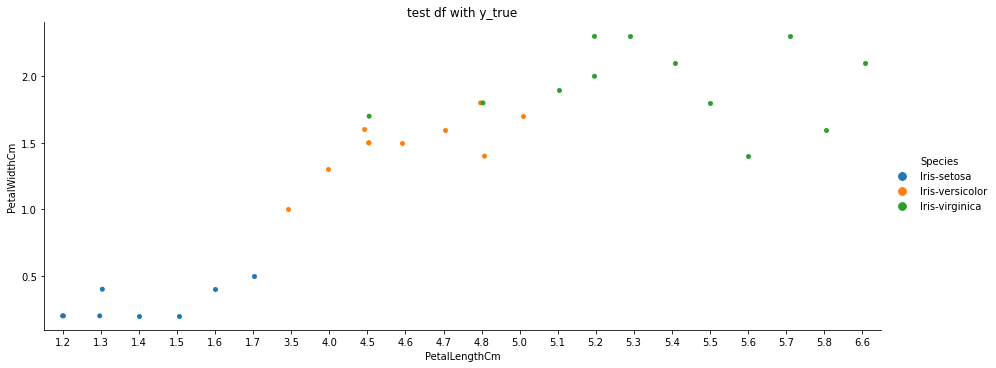

In [7]:
sns.catplot(x='PetalLengthCm', y='PetalWidthCm', data=test_df, hue='Species', aspect=2.5).set(title='test df with y_true')

### define x_train , y_train , x_test and y_test   

In [8]:
y_train = df_train["Species"]
y_test = df_test["Species"]
x_train = df_train.drop(["Id", "Species"], axis=1)
x_test = df_test.drop(["Id", "Species"], axis=1)

In [9]:
print(y_train.value_counts())
print(y_test.value_counts())

Iris-setosa        42
Iris-versicolor    40
Iris-virginica     38
Name: Species, dtype: int64
Iris-virginica     12
Iris-versicolor    10
Iris-setosa         8
Name: Species, dtype: int64


In [10]:
print(x_train.isna().sum())
print(x_test.isna().sum())
print(y_train.isna().sum())
print(y_test.isna().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64
0
0


### define a function to calculate the Euclidean distance between two points

In [11]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [12]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


### KNN algorithm

In [13]:
def knn(x_train, x_test, y_train, K):
    X_train = x_train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy()
    X_test = x_test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy()
    Y_train = y_train.to_numpy()
    y_pred = []
    for x_te in X_test:
        distances = []  # empty list to store the distances and labels
        for x_tr, y_tr in zip(X_train, Y_train):
            distance = euclidean_distance(x_te, x_tr)  # calculate the distance between test and train
            distances.append((distance, y_tr))  # append the distance and label to list
        distances.sort()
        k_nearest = distances[:K]  # get the first K elements from the list
        k_nearest_labels = [label for _, label in k_nearest]  # get the labels of the K nearest neighbors
        # get the most common label among the K nearest neighbors
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        y_pred.append(most_common)
    return y_pred

### calculate  y_pred_for_x_test

In [14]:
k = 4
y_pred_for_x_test = knn(x_train, x_test, y_train, k)

In [15]:
y_pred_for_x_test

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica']

### calculate accuracy score , f1 score , recall score and precision score with y_test y_pred_for_x_test

In [16]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
print("accuracy score for x test prediction: ", accuracy_score(y_test, y_pred_for_x_test))
print("f1 score for x test prediction: ", f1_score(y_test, y_pred_for_x_test, average='weighted'))
print("recall score for x test prediction: ", recall_score(y_test, y_pred_for_x_test, average='weighted'))
print("precision score for x test prediction: ", precision_score(y_test, y_pred_for_x_test, average='weighted'))

accuracy score for x test prediction:  0.9333333333333333
f1 score for x test prediction:  0.9333333333333333
recall score for x test prediction:  0.9333333333333333
precision score for x test prediction:  0.9333333333333333


### confusion_matrix with y_test and y_pred_for_x_test 

<AxesSubplot:>

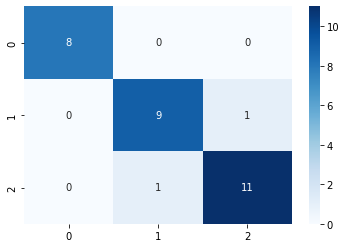

In [17]:
con_matrix=confusion_matrix(y_test, y_pred_for_x_test)
sns.heatmap(con_matrix,annot=True, cmap="Blues")

### y_pred_for_x_test dataFrame

In [18]:
y_pred_for_x_test_df = pd.DataFrame(y_pred_for_x_test,columns=['Species'])

### concat x_test and y_pred_for_x_test dataFrame

In [19]:
test_df_after_prediction = pd.concat([x_test, y_pred_for_x_test_df], axis=1)
test_df_after_prediction

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,5.0,3.4,1.5,0.2,Iris-setosa
2,5.8,4.0,1.2,0.2,Iris-setosa
3,5.4,3.9,1.3,0.4,Iris-setosa
4,5.1,3.3,1.7,0.5,Iris-setosa
5,5.0,3.4,1.6,0.4,Iris-setosa
6,5.0,3.2,1.2,0.2,Iris-setosa
7,4.4,3.2,1.3,0.2,Iris-setosa
8,6.4,3.2,4.5,1.5,Iris-versicolor
9,6.5,2.8,4.6,1.5,Iris-versicolor


### calculate y_pred_for_x_train

In [20]:
y_pred_for_x_train = knn(x_train, x_train, y_train, k)

### calculate accuracy score , f1 score , recall score and precision score with y_train and y_pred_for_x_train

In [21]:
print("accuracy score for x train prediction: ", accuracy_score(y_train, y_pred_for_x_train))
print("f1 score for x train prediction: ", f1_score(y_train, y_pred_for_x_train, average='weighted'))
print("recall score for x train prediction: ", recall_score(y_train, y_pred_for_x_train, average='weighted'))
print("precision score for x train prediction: ", precision_score(y_train, y_pred_for_x_train, average='weighted'))

accuracy score for x train prediction:  0.9666666666666667
f1 score for x train prediction:  0.9666666666666667
recall score for x train prediction:  0.9666666666666667
precision score for x train prediction:  0.9666666666666667


### confusion_matrix with  y_train and y_pred_for_x_train 

<AxesSubplot:>

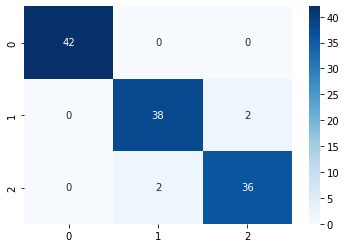

In [22]:
con_matrix=confusion_matrix(y_train, y_pred_for_x_train)
sns.heatmap(con_matrix,annot=True, cmap="Blues")

### concat x_train and y_pred_for_x_train dataFrame

In [23]:
y_pred_for_x_train_df = pd.DataFrame(y_pred_for_x_train,columns=['Species'])
train_df_after_prediction = pd.concat([x_train, y_pred_for_x_train_df], axis=1)
train_df_after_prediction

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.4,3.0,4.5,1.5,Iris-versicolor
1,7.7,2.8,6.7,2.0,Iris-virginica
2,5.2,3.4,1.4,0.2,Iris-setosa
3,4.8,3.4,1.9,0.2,Iris-setosa
4,6.6,3.0,4.4,1.4,Iris-versicolor
...,...,...,...,...,...
115,7.7,3.8,6.7,2.2,Iris-virginica
116,5.2,2.7,3.9,1.4,Iris-versicolor
117,4.8,3.0,1.4,0.3,Iris-setosa
118,5.2,4.1,1.5,0.1,Iris-setosa


### plot PetalLengthCm - PetalWidthCm for train_df_after_prediction

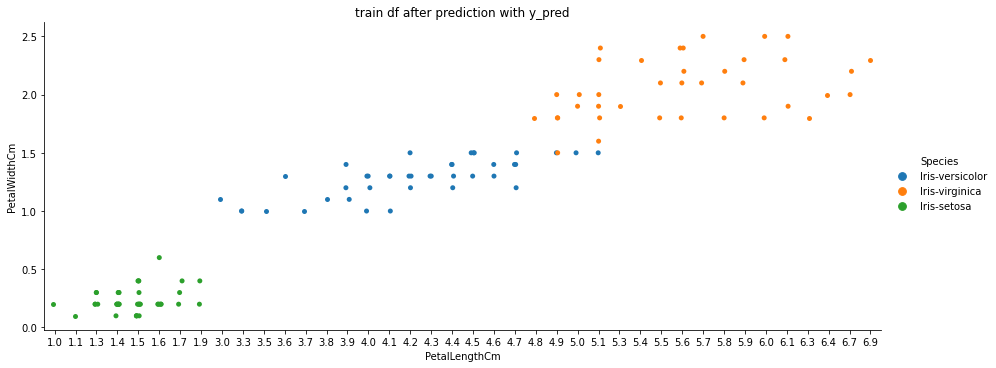

In [24]:
sns.catplot(x='PetalLengthCm', y='PetalWidthCm', data=train_df_after_prediction, hue='Species', aspect=2.5).set(title='train df after prediction with y_pred')

### plot PetalLengthCm - PetalWidthCm for test_df_after_prediction

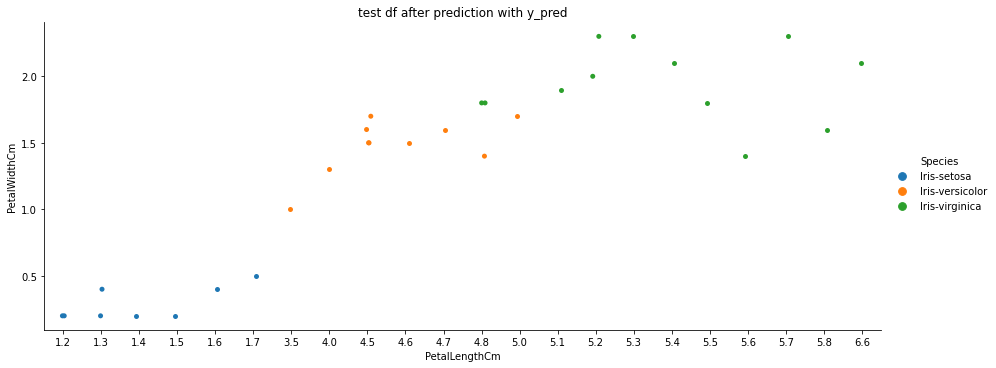

In [25]:
sns.catplot(x='PetalLengthCm', y='PetalWidthCm', data=test_df_after_prediction, hue='Species', aspect=2.5).set(title='test df after prediction with y_pred')

### save to csv

In [26]:
y_pred_for_x_test_df.to_csv("Q2.csv",index=False)